# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities, 1):  # Start enumeration from 1
        
    # Group cities in sets of 50 for logging purposes
    if i % 50 == 0:
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"

    # Log the url, record, and set numbers (increment record_count by 1 for correct logging)
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make the API request
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    # If an error is experienced, skip the city
    except Exception as e:
        print(f"City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kourou
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | bandar lampung
Processing Record 4 of Set 1 | happy valley-goose bay
Processing Record 5 of Set 1 | iwaki
Processing Record 6 of Set 1 | paracuru
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | espargos
City not found. Skipping...
Processing Record 9 of Set 1 | tobi village
City not found. Skipping...
Processing Record 10 of Set 1 | fortuna
Processing Record 11 of Set 1 | haiku-pauwela
Processing Record 12 of Set 1 | pervomayskoye
Processing Record 13 of Set 1 | sao jose da coroa grande
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | nuuk
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 19 of Set 1 | puerto ayora
Processing Record 

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [24]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kourou,5.1552,-52.6478,300.18,89,37,2.98,GF,1712113745
1,adamstown,-25.0660,-130.1015,297.49,70,100,11.40,PN,1712114381
2,bandar lampung,-5.4254,105.2580,303.93,68,59,1.59,ID,1712114157
3,happy valley-goose bay,53.3168,-60.3315,269.51,92,27,1.42,CA,1712114109
4,iwaki,37.0500,140.8833,291.91,64,100,1.56,JP,1712114382


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/rohapatel/UCB_BootCamp/Challenges/python-api-challenge/output_data/cities.csv", index_label="City_ID")

In [29]:
# Read saved data
city_data_df = pd.read_csv("/Users/rohapatel/UCB_BootCamp/Challenges/python-api-challenge/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kourou,5.1552,-52.6478,300.18,89,37,2.98,GF,1712113745
1,adamstown,-25.0660,-130.1015,297.49,70,100,11.40,PN,1712114381
2,bandar lampung,-5.4254,105.2580,303.93,68,59,1.59,ID,1712114157
3,happy valley-goose bay,53.3168,-60.3315,269.51,92,27,1.42,CA,1712114109
4,iwaki,37.0500,140.8833,291.91,64,100,1.56,JP,1712114382


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

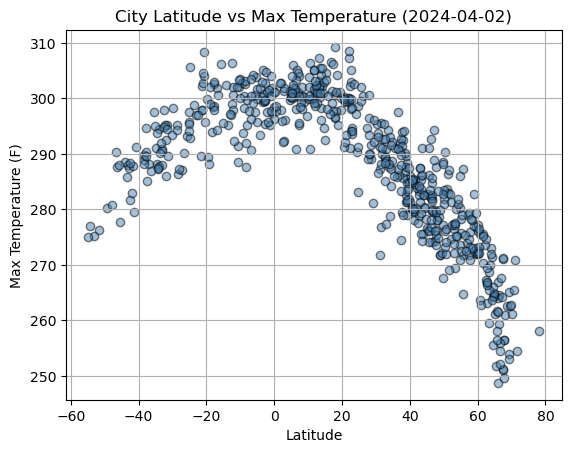

In [47]:
# Build scatter plot for latitude vs. temperature
today = time.strftime("%Y-%m-%d")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Max Temp"]).astype(float), facecolors="steelblue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
plt.grid(True)

# Save the figure
plt.savefig("/Users/rohapatel/UCB_BootCamp/Challenges/python-api-challenge/output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

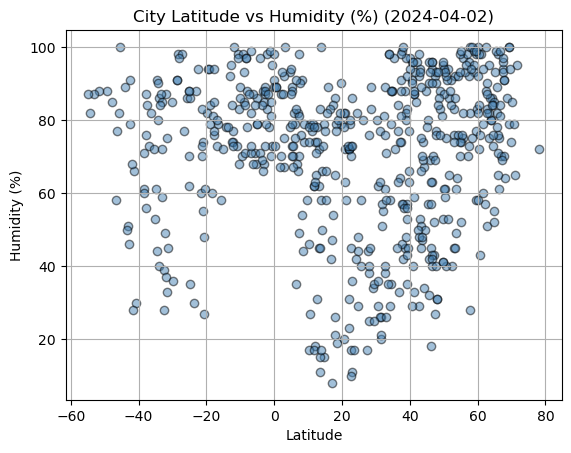

In [48]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%Y-%m-%d")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Humidity"]).astype(float), facecolors="steelblue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
plt.grid(True)

# Save the figure
plt.savefig("/Users/rohapatel/UCB_BootCamp/Challenges/python-api-challenge/output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

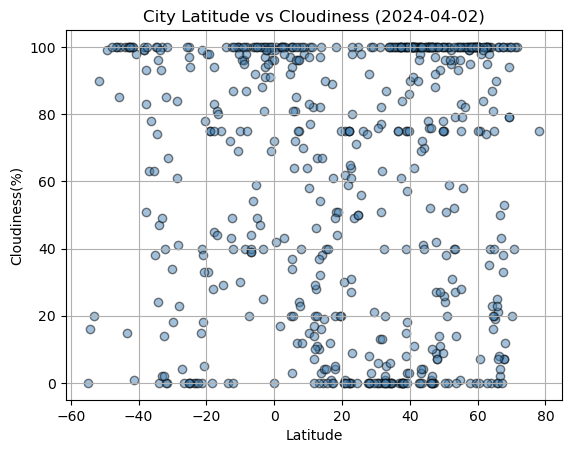

In [49]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%Y-%m-%d")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Cloudiness"]).astype(float), facecolors="steelblue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
plt.grid(True)

# Save the figure
plt.savefig("/Users/rohapatel/UCB_BootCamp/Challenges/python-api-challenge/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

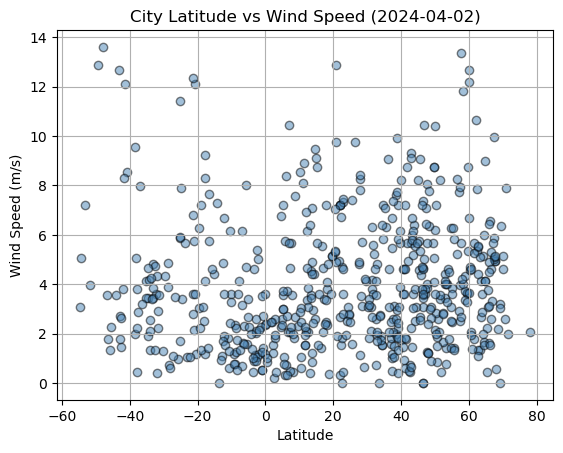

In [50]:
# Build the scatter plots for latitude vs. humidity
today = time.strftime("%Y-%m-%d")
plt.scatter(pd.to_numeric(city_data_df["Lat"]).astype(float), pd.to_numeric(city_data_df["Wind Speed"]).astype(float), facecolors="steelblue", edgecolors="black", alpha = 0.5)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs Wind Speed ({today})")
plt.grid(True)

# Save the figure
plt.savefig("/Users/rohapatel/UCB_BootCamp/Challenges/python-api-challenge/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kourou,5.1552,-52.6478,300.18,89,37,2.98,GF,1712113745
3,happy valley-goose bay,53.3168,-60.3315,269.51,92,27,1.42,CA,1712114109
4,iwaki,37.0500,140.8833,291.91,64,100,1.56,JP,1712114382
7,fortuna,40.5982,-124.1573,284.78,96,100,3.60,US,1712114383
8,haiku-pauwela,20.9219,-156.3051,299.38,72,75,12.86,US,1712114383


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,297.49,70,100,11.40,PN,1712114381
2,bandar lampung,-5.4254,105.2580,303.93,68,59,1.59,ID,1712114157
5,paracuru,-3.4100,-39.0306,299.32,88,25,0.88,BR,1712114382
6,port-aux-francais,-49.3500,70.2167,280.19,88,99,12.89,TF,1712114382
10,sao jose da coroa grande,-8.8978,-35.1478,300.39,85,96,2.33,BR,1712114383


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9059903957337461


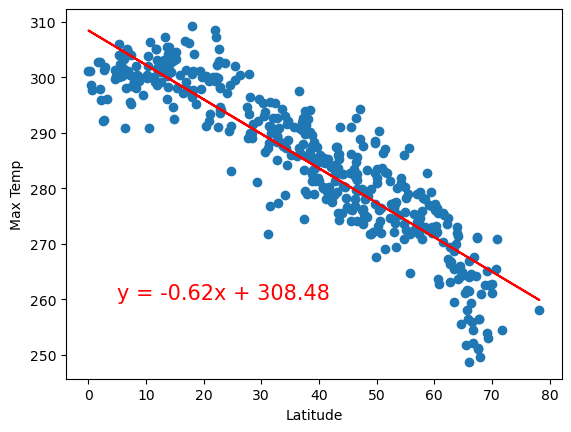

In [71]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Max Temp"]).astype(float)

# Calculate the linear regression for the Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (5, 260), fontsize=15, color="red")

# Set labels for the axes
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.7495332040071636


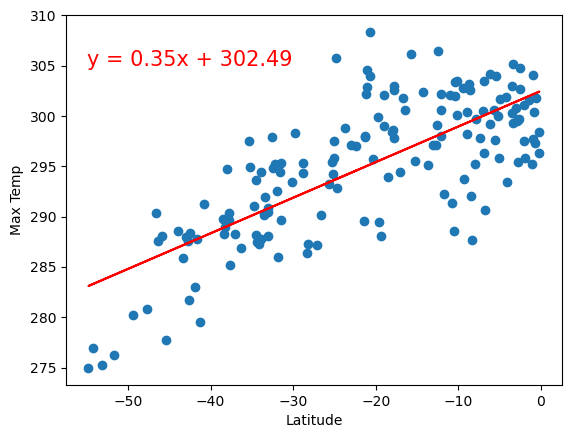

In [69]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Max Temp"]).astype(float)

# Calculate the linear regression for the Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (-55, 305), fontsize=15, color="red")

# Set labels for the axes
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2384534415120026


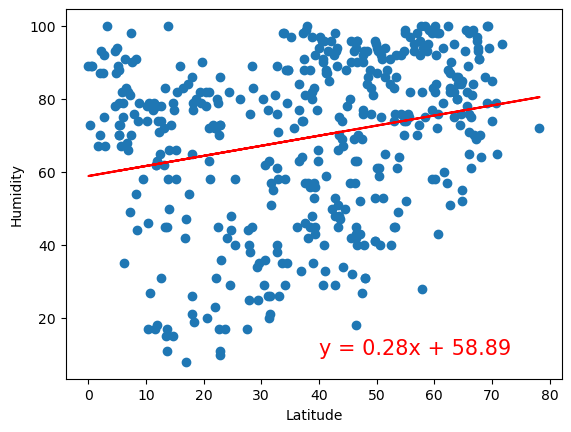

In [68]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Humidity"]).astype(float)

# Calculate the linear regression for the Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (40,10), fontsize=15, color="red")

# Set labels for the axes
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.283051107755327


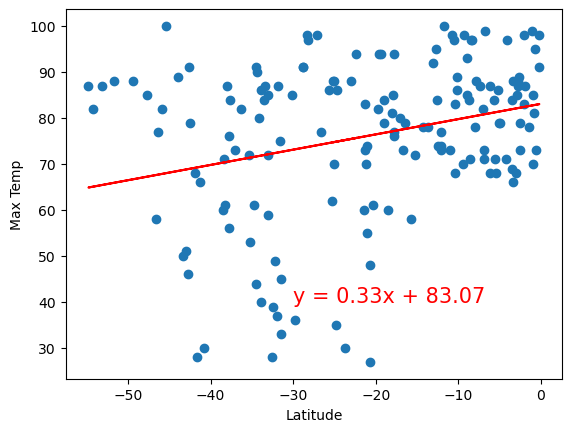

In [72]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Humidity"]).astype(float)

# Calculate the linear regression for the Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (-30, 40), fontsize=15, color="red")

# Set labels for the axes
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.12001626615608497


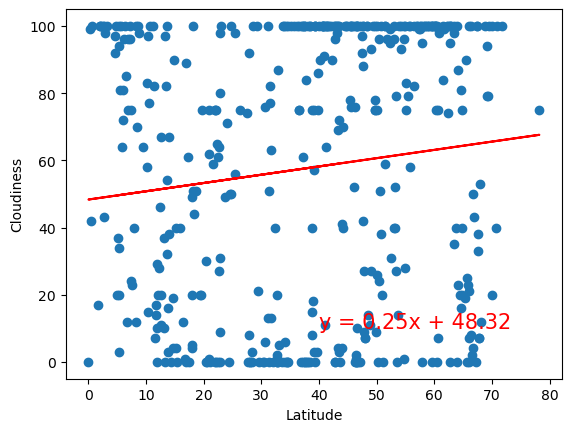

In [73]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Cloudiness"]).astype(float)

# Calculate the linear regression for the Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (40,10), fontsize=15, color="red")

# Set labels for the axes
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: 0.14432702675436826


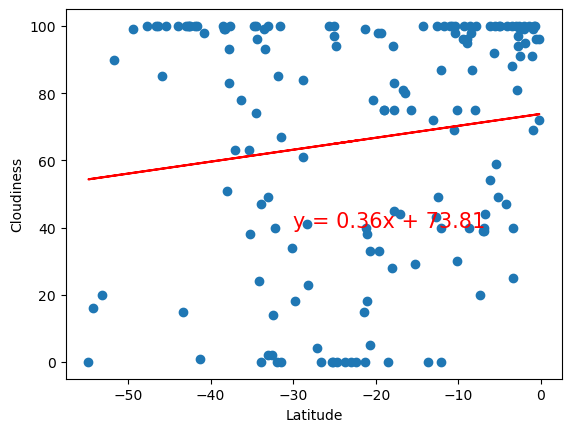

In [74]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Cloudiness"]).astype(float)

# Calculate the linear regression for the Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (-30, 40), fontsize=15, color="red")

# Set labels for the axes
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1185845976146894


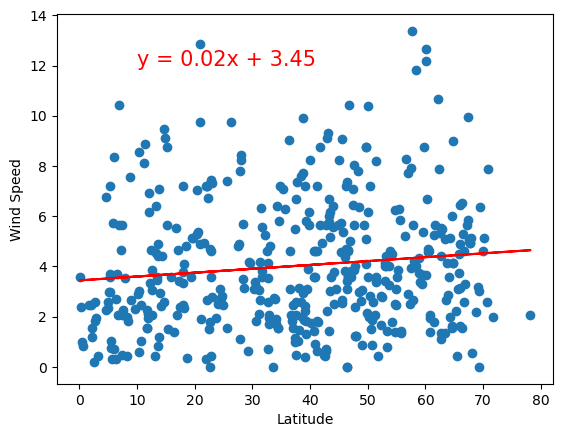

In [79]:
# Northern Hemisphere
x_values = pd.to_numeric(northern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(northern_hemi_df["Wind Speed"]).astype(float)

# Calculate the linear regression for the Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (10, 12), fontsize=15, color="red")

# Set labels for the axes
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

The r-value is: -0.319428378679775


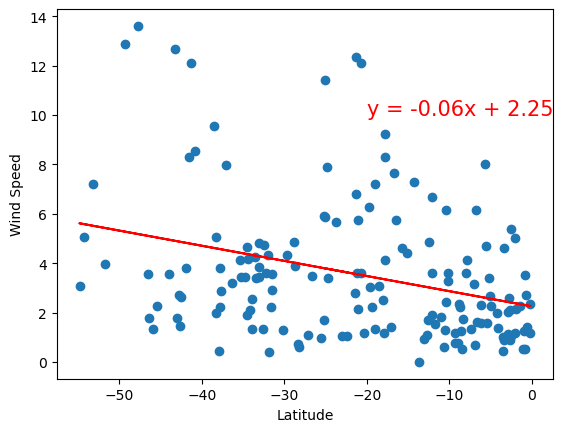

In [77]:
# Southern Hemisphere
x_values = pd.to_numeric(southern_hemi_df["Lat"]).astype(float)
y_values = pd.to_numeric(southern_hemi_df["Wind Speed"]).astype(float)

# Calculate the linear regression for the Southern Hemisphere data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter plot and the linear regression line
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Annotate the linear regression equation on the plot
plt.annotate(line_eq, (-20, 10), fontsize=15, color="red")

# Set labels for the axes
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The r-value is: {rvalue}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE